In [5]:
import torchaudio.transforms as T
import torch


import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio, display



### Transformer configuration + Visualization
* 최종
* 참고 : https://pytorch.org/tutorials/beginner/audio_preprocessing_tutorial.html#melspectrogram
    * transformer
* 참고 : https://tutorials.pytorch.kr/beginner/audio_resampling_tutorial.html
    * resampler
* 참고 : https://tutorials.pytorch.kr/beginner/audio_datasets_tutorial.html

In [6]:
import torchaudio.transforms as T
import torchaudio.functional as F
import torch


import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio, display




def MelSpectrogram_transform(feats_cfg):
    # Sound Event Detection 추천 feature 사용
    spectrogram = T.MelSpectrogram(sample_rate= feats_cfg['sample_rate'],
                                   n_fft = feats_cfg['n_fft'],
                                   win_length = None, 
                                   hop_length = feats_cfg['hop_length'], 
                                   n_mels = feats_cfg['n_mels'], 
                                   window_fn = torch.hamming_window, 
                                   power = feats_cfg['power']) # 1 : energy, 2 : power
    return(spectrogram)


def resampler(waveform, sample_rate, resample_rate):
    resampled_waveform = F.resample(
        waveform,
        sample_rate,
        resample_rate,
        lowpass_filter_width=16,
        rolloff=0.85,
        resampling_method="kaiser_window",
        beta=8.555504641634386
    )

    return resampled_waveform, resample_rate


#@title Prepare data and utility functions. {display-mode: "form"}
#@markdown
#@markdown You do not need to look into this cell.
#@markdown Just execute once and you are good to go.
#@markdown
#@markdown In this tutorial, we will use a speech data from [VOiCES dataset](https://iqtlabs.github.io/voices/), which is licensed under Creative Commos BY 4.0.

#-------------------------------------------------------------------------------
# Preparation of data and helper functions.
#-------------------------------------------------------------------------------


def print_stats(waveform, sample_rate=None, src=None):
  if src:
    print("-" * 10)
    print("Source:", src)
    print("-" * 10)
  if sample_rate:
    print("Sample Rate:", sample_rate)
  print("Shape:", tuple(waveform.shape))
  print("Dtype:", waveform.dtype)
  print(f" - Max:     {waveform.max().item():6.3f}")
  print(f" - Min:     {waveform.min().item():6.3f}")
  print(f" - Mean:    {waveform.mean().item():6.3f}")
  print(f" - Std Dev: {waveform.std().item():6.3f}")
  print()
  print(waveform)
  print()

def plot_spectrogram(spec, title=None, ylabel='freq_bin', aspect='auto', xmax=None):
  fig, axs = plt.subplots(1, 1)
  axs.set_title(title or 'Spectrogram (db)')
  axs.set_ylabel(ylabel)
  axs.set_xlabel('frame')
  im = axs.imshow(librosa.power_to_db(spec), origin='lower', aspect=aspect)
  if xmax:
    axs.set_xlim((0, xmax))
  fig.colorbar(im, ax=axs)
  plt.show(block=False)

def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None, ylim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].plot(time_axis, waveform[c], linewidth=1)
    axes[c].grid(True)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
    if ylim:
      axes[c].set_ylim(ylim)
  figure.suptitle(title)
  plt.show(block=False)

### This function(play_audio) operates only on jupyter notebook.(not vscode)
def play_audio(waveform, sample_rate):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  if num_channels == 1:
    display(Audio(waveform[0], rate=sample_rate))
  elif num_channels == 2:
    display(Audio((waveform[0], waveform[1]), rate=sample_rate))
  else:
    raise ValueError("Waveform with more than 2 channels are not supported.")


### test 1번.
* read_audio 적용 전(pad_audio를 안짜서 audio 마다 length가 다름)

In [7]:
import torchaudio
import yaml

from resampler import *
from dataset import read_audio

ImportError: attempted relative import with no known parent package

In [ ]:
with open('..\\config\\default.yml') as f:
    conf = yaml.load(f, Loader = yaml.FullLoader)

In [8]:
print(conf['feats'])

NameError: name 'conf' is not defined

In [9]:
test_audio = 'z:\\nas1_data\\user\\hhj\\sound_event_detection\\data\\mivia_raw\\audio\\D\\v2\\00047_1.wav'
sig, fs = torchaudio.load(test_audio)

In [10]:
sig_16000, fs = resampler(sig, fs, 16000)
print(type(sig_16000), fs)
print(sig.shape)
print(sig_16000.shape)

<class 'torch.Tensor'> 16000
torch.Size([1, 2101452])
torch.Size([1, 1050726])


In [ ]:
trans = MelSpectrogram_transform(conf['feats'])

Shape: (1, 40, 4105)
Dtype: torch.float32
 - Max:     291.912
 - Min:      0.001
 - Mean:     7.318
 - Std Dev: 16.297

tensor([[[2.1342e-03, 2.8545e-03, 4.0992e-03,  ..., 7.4426e-01,
          9.7052e-01, 1.0534e+00],
         [4.1498e-03, 4.3718e-03, 4.2053e-03,  ..., 3.4440e+00,
          4.0455e+00, 4.0614e+00],
         [4.0589e-03, 4.4085e-03, 4.3279e-03,  ..., 4.7836e+00,
          4.4884e+00, 3.6854e+00],
         ...,
         [8.8946e-03, 9.3681e-03, 9.0700e-03,  ..., 1.2021e-01,
          1.4780e-01, 1.6996e-01],
         [4.5439e-03, 4.7596e-03, 4.5960e-03,  ..., 6.7751e-02,
          8.4723e-02, 1.0002e-01],
         [1.4586e-03, 1.3909e-03, 1.1392e-03,  ..., 3.7946e-02,
          6.1110e-02, 7.7339e-02]]])



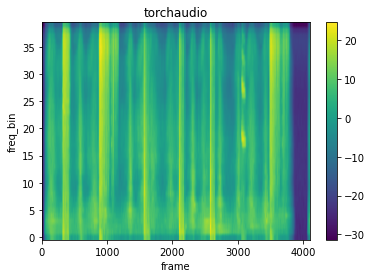

In [ ]:
s = trans(sig_16000)
print_stats(s)
plot_spectrogram(s[0], title='torchaudio')

Shape: (1, 40, 3782)
Dtype: torch.float32
 - Max:     405.841
 - Min:      0.001
 - Mean:     6.279
 - Std Dev: 16.346

tensor([[[9.2806e+00, 1.0136e+01, 9.8669e+00,  ..., 4.1413e-03,
          3.9889e-03, 3.5715e-03],
         [1.5307e+01, 1.5830e+01, 1.5324e+01,  ..., 3.8515e-03,
          4.4540e-03, 4.5923e-03],
         [1.1804e+01, 1.2632e+01, 1.2998e+01,  ..., 4.4823e-03,
          4.5208e-03, 4.0673e-03],
         ...,
         [1.7350e+00, 1.7446e+00, 1.6649e+00,  ..., 9.3032e-03,
          9.9281e-03, 9.9670e-03],
         [7.1797e-01, 7.2560e-01, 7.2295e-01,  ..., 4.2669e-03,
          4.4202e-03, 4.3641e-03],
         [7.2668e-01, 6.4785e-01, 4.4531e-01,  ..., 1.0387e-03,
          1.3880e-03, 1.5521e-03]]])



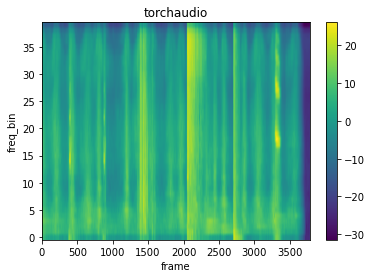

In [ ]:
test_audio = 'z:\\nas1_data\\user\\hhj\\sound_event_detection\\data\\mivia_raw\\audio\\D\\v2\\00046_1.wav'
sig, fs = torchaudio.load(test_audio)
sig_16000, fs = resampler(sig, fs, 16000)
s = trans(sig_16000)
print_stats(s)
plot_spectrogram(s[0], title='torchaudio')

### test case 2번.txt
* read_audio 함수(pad_audio 포함)를 짜서, 모든 audio length 통일함.

In [ ]:
audio_dir_1 = 'z:\\nas1_data\\user\\hhj\\sound_event_detection\\data\\mivia_raw\\audio\\D\\v2\\00047_1.wav'
audio_dir_2 = 'z:\\nas1_data\\user\\hhj\\sound_event_detection\\data\\mivia_raw\\audio\\D\\v2\\00046_1.wav'

In [ ]:
audio_1, fs_1 = read_audio(audio_dir_1, pad_to = 960000, resample_rate = 16000)
audio_2, fs_2 = read_audio(audio_dir_2, pad_to = 960000, resample_rate = 16000)
print(audio_1.shape, fs_1)
print(audio_2.shape, fs_2)
print(audio_1.dtype)

torch.Size([960000]) 16000
torch.Size([960000]) 16000
torch.float32


In [ ]:
print(conf['feats'])

{'n_mels': 40, 'hop_length': 256, 'n_fft': 2048, 'win_length': 'None', 'sample_rate': 16000, 'power': 1, 'net_pooling': 1}


torch.Size([40, 3751])
Shape: (40, 3751)
Dtype: torch.float32
 - Max:     291.912
 - Min:      0.001
 - Mean:     7.975
 - Std Dev: 16.898

tensor([[2.1342e-03, 2.8545e-03, 4.0992e-03,  ..., 1.4015e+00, 1.3697e+00,
         1.2630e+00],
        [4.1498e-03, 4.3718e-03, 4.2053e-03,  ..., 3.7505e+00, 3.0626e+00,
         2.3119e+00],
        [4.0589e-03, 4.4085e-03, 4.3279e-03,  ..., 4.3601e+00, 4.3484e+00,
         4.0556e+00],
        ...,
        [8.8946e-03, 9.3681e-03, 9.0700e-03,  ..., 9.6848e+00, 7.9640e+00,
         7.1861e+00],
        [4.5439e-03, 4.7596e-03, 4.5960e-03,  ..., 4.7682e+00, 3.8765e+00,
         3.2815e+00],
        [1.4586e-03, 1.3909e-03, 1.1392e-03,  ..., 8.3394e-01, 7.4458e-01,
         6.9691e-01]])



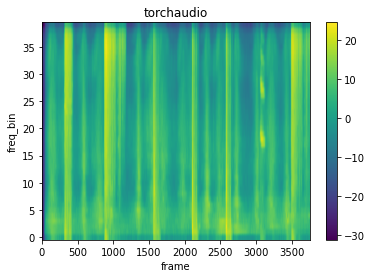

In [ ]:
trans = MelSpectrogram_transform(conf['feats'])
s = trans(audio_1)
print(s.shape)
print_stats(s)
plot_spectrogram(s, title='torchaudio')

### test 3.
* spectogram의 결과 frame 원리 분석

In [ ]:
audio_1, fs_1 = read_audio(audio_dir_1, pad_to = 100, resample_rate = 16000)
audio_2, fs_2 = read_audio(audio_dir_2, pad_to = 100, resample_rate = 16000)
print(audio_1.shape, fs_1)
print(audio_2.shape, fs_2)
print(audio_1.dtype)

torch.Size([100]) 16000
torch.Size([100]) 16000
torch.float32


In [ ]:
spectrogram = T.MelSpectrogram(sample_rate= 16000,
                                n_fft = 10,
                                win_length = None, 
                                hop_length = 15, 
                                n_mels = 40, 
                                window_fn = torch.hamming_window, 
                                power = 1) # 1 : energy, 2 : power

torch.Size([100])
torch.Size([40, 7])
Shape: (40, 7)
Dtype: torch.float32
 - Max:      0.000
 - Min:      0.000
 - Mean:     0.000
 - Std Dev:  0.000

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.00

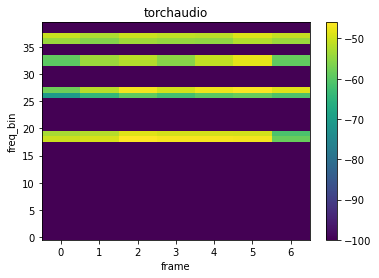

In [ ]:
print(audio_1.shape)
s = spectrogram(audio_1)
print(s.shape)
print_stats(s)
plot_spectrogram(s, title='torchaudio')

### test 4.
* 

In [1]:
from encoder import *
from dataset import *

In [2]:
with open('..\\config\\default.yml') as f:
    conf = yaml.load(f, Loader = yaml.FullLoader)

In [5]:
def MelSpectrogram_transform_2(feats_cfg):
    # Sound Event Detection 추천 feature 사용
    spectrogram = T.MelSpectrogram(sample_rate= feats_cfg['sample_rate'],
                                   n_fft = feats_cfg['n_fft'],
                                   win_length = None, 
                                   hop_length = feats_cfg['hop_length'], 
                                   n_mels = feats_cfg['n_mels'], 
                                   window_fn = torch.hamming_window, 
                                   power = 1,
                                   wkwargs={"periodic": False} ) # 1 : energy, 2 : power
    return(spectrogram)

In [6]:
encoder = multi_label_encoder(
    fs = conf['feats']['sample_rate'], 
    audio_len = conf['feats']['audio_len'], 
    n_fft = conf['feats']['n_fft'], 
    hop_length = conf['feats']['hop_length'], 
    net_pooling = conf['feats']['net_pooling']
    )

training_data = mivia(
    conf['data']['audio_folder'], 
    encoder = encoder,
    transform = MelSpectrogram_transform_2(conf['feats']),
    target_transform= None, 
    partition = conf['data']['select_traindata'], 
    pad_to = conf['feats']['audio_len'],
    fs = conf['feats']['sample_rate']
    )

test_data = mivia(
    conf['data']['audio_folder'], 
    encoder = encoder,
    transform = MelSpectrogram_transform_2(conf['feats']),
    target_transform= None, 
    partition = conf['data']['select_testdata'], 
    pad_to = conf['feats']['audio_len'],
    fs = conf['feats']['sample_rate']
    )

validation_data = mivia(
    conf['data']['audio_folder'], 
    encoder = encoder,
    transform = MelSpectrogram_transform_2(conf['feats']),
    target_transform= None, 
    partition = conf['data']['select_valdata'], 
    pad_to = conf['feats']['audio_len'],
    fs = conf['feats']['sample_rate']
    )
# test_data = mivia(conf['data']['audio_folder'], conf['data']['xml_folder'], encoder, partition = conf['data']['select_testdata'], transform = MelSpectrogram_transform(conf['feats']))

In [7]:
train_dataloader = DataLoader(training_data, batch_size = 2)
test_dataloader = DataLoader(test_data, batch_size = 2)
validation_dataloader = DataLoader(validation_data, batch_size = 2)

In [8]:
audio, target = next(iter(train_dataloader))

In [9]:
audio.shape

torch.Size([2, 40, 3751])

In [32]:
strong_mask = torch.zeros(2).to(torch.zeros(40, 3751)).bool()

In [33]:
strong_mask.shape

torch.Size([2])

# resampler 추가

#### test1 : 
* test sample : 'z:\\nas1_data\\user\\hhj\\sound_event_detection\\data\\mivia_raw\\audio\\D\\v2\\00047_1.wav'

In [4]:
test_audio = 'z:\\nas1_data\\user\\hhj\\sound_event_detection\\data\\mivia_raw\\audio\\D\\v2\\00047_1.wav'
sig, fs = torchaudio.load(test_audio)
print(sig.shape)
print(fs)
play_audio(sig, fs)

NameError: name 'torchaudio' is not defined

In [11]:
a = resampler(sig, fs, 16000)
print(a.shape)
play_audio(a, 16000)

AttributeError: 'tuple' object has no attribute 'shape'

### test 2 : 
* test sample : 'z:\\nas1_data\\user\\hhj\\sound_event_detection\\data\\mivia_raw\\audio\\D\\v2\\00046_1.wav'


In [12]:
test_audio = 'z:\\nas1_data\\user\\hhj\\sound_event_detection\\data\\mivia_raw\\audio\\D\\v2\\00046_1.wav'
sig, fs = torchaudio.load(test_audio)

In [13]:
print(sig.shape)
print(fs)
play_audio(sig, fs)

torch.Size([1, 1935988])
32000


In [14]:
a = resampler(sig, fs, 16000)
print(a.shape)
play_audio(a, 16000)

AttributeError: 'tuple' object has no attribute 'shape'

### test3. mono 적용 test
* 결론 mono로 바꾸고 resample하나, resample하고 mono로 가나 결과는 동일하다.(mivia dataset에 한정)

In [15]:

def to_mono(mixture, random_ch=False):

    if mixture.ndim > 1:  # multi channel
        if not random_ch:
            mixture = torch.mean(mixture, 0)
        else:  # randomly select one channel
            indx = np.random.randint(0, mixture.shape[0] - 1)
            mixture = mixture[indx]
    return mixture

In [16]:
test_audio = 'z:\\nas1_data\\user\\hhj\\sound_event_detection\\data\\mivia_raw\\audio\\D\\v2\\00046_1.wav'
sig, fs = torchaudio.load(test_audio)
sig_mono = to_mono(sig)

print(fs)
print(sig.shape)
print(sig_mono.shape)

32000
torch.Size([1, 1935988])
torch.Size([1935988])


In [17]:
sig_resample_origin = resampler(sig, fs, 16000)
sig_resample_mono = resampler(sig_mono, fs, 16000)

In [18]:
print(sig.shape)
print(sig_resample_origin.shape)
print(sig_resample_origin[0].shape)

torch.Size([1, 1935988])


AttributeError: 'tuple' object has no attribute 'shape'

In [19]:
print(sig_mono.shape)
print(sig_resample_mono.shape)

torch.Size([1935988])


AttributeError: 'tuple' object has no attribute 'shape'

In [20]:
torch.equal(sig_resample_mono,sig_resample_origin[0] )

TypeError: equal(): argument 'input' (position 1) must be Tensor, not tuple